In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.8.16
Tensorflow version: 2.9.2
Keras version: 2.9.0


In [3]:
%load_ext tensorboard

In [4]:
!rm -rf ./.logs/

In [5]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [10]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [11]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [13]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [14]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1920 - accuracy: 0.9403 - val_loss: 0.0575 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0513 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0509 - accuracy: 0.9837 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0310 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0293 -

In [15]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [16]:
loaded_model = tf.keras.models.load_model(model_name)

In [17]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 3s 8ms/step


In [18]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [19]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,9.029269e-12,7.799898e-09,5.369154e-10,5.898679e-08,5.413701e-10,1.126900e-12,5.145772e-16,9.999999e-01,1.311147e-11,1.310966e-09
1,7.995806e-10,1.252495e-11,9.999999e-01,8.693226e-15,4.922036e-13,3.041748e-19,3.718459e-10,1.911410e-13,2.573826e-13,5.363271e-13
2,2.890139e-10,9.999998e-01,1.781421e-11,6.746028e-16,1.051708e-07,1.196348e-10,1.630569e-08,1.285377e-09,4.506363e-09,1.040238e-11
3,9.999995e-01,4.046014e-13,2.650326e-12,9.370071e-13,2.630782e-11,7.029799e-12,5.035962e-07,2.429078e-11,4.542619e-11,2.316139e-09
4,6.007441e-10,8.078023e-10,5.621928e-10,9.985514e-14,9.999647e-01,1.629528e-13,1.030262e-10,2.782215e-12,1.075710e-12,3.527683e-05
...,...,...,...,...,...,...,...,...,...,...
9995,4.490463e-17,6.146892e-11,9.999999e-01,1.070439e-15,1.429168e-17,2.957595e-24,2.842596e-19,3.549285e-08,7.320531e-18,7.942482e-18
9996,1.772437e-11,8.092187e-10,2.200208e-10,9.999999e-01,3.639017e-15,1.909837e-08,1.152575e-14,1.060901e-10,1.516474e-10,4.736175e-10
9997,3.898453e-16,9.676310e-10,5.292258e-14,4.242819e-16,9.999999e-01,7.578958e-14,1.375296e-14,1.335023e-10,4.467375e-08,2.351131e-11
9998,6.337871e-11,1.280941e-12,1.344483e-15,2.414489e-11,3.690730e-16,9.991998e-01,6.131204e-08,6.895110e-17,8.000778e-04,8.564008e-15


In [20]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [21]:
print(predictions[0])

7


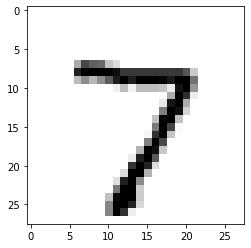

In [22]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()